In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-exam-scores/Original_data_with_more_rows.csv
/kaggle/input/students-exam-scores/Expanded_data_with_more_features.csv


**Hello everyone, it's been a while since I posted something here. I'm ready to make new projects and share other analysis with you!**

In [2]:
import matplotlib as plt
import seaborn as sns

# Data Processing:

In [3]:
df= pd.read_csv('/kaggle/input/students-exam-scores/Original_data_with_more_rows.csv')

In [4]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    30641 non-null  int64 
 1   Gender        30641 non-null  object
 2   EthnicGroup   30641 non-null  object
 3   ParentEduc    30641 non-null  object
 4   LunchType     30641 non-null  object
 5   TestPrep      30641 non-null  object
 6   MathScore     30641 non-null  int64 
 7   ReadingScore  30641 non-null  int64 
 8   WritingScore  30641 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 2.1+ MB


In [6]:
df.isnull().sum()

Unnamed: 0      0
Gender          0
EthnicGroup     0
ParentEduc      0
LunchType       0
TestPrep        0
MathScore       0
ReadingScore    0
WritingScore    0
dtype: int64

In [7]:
df.rename(columns={'Unnamed: 0':'Id'},inplace=True)

**Exams score by gender:**

In [8]:
pv1=pd.pivot_table(df,index='Gender',values=['MathScore','ReadingScore','WritingScore'])

In [9]:
pv1

,MathScore,ReadingScore,WritingScore
Gender,,,
female,64.262902,73.093815,72.897692
male,69.269633,66.108957,63.978708


In [10]:
plt.style.use('ggplot')


[Text(0.5, 0, '72.8977'), Text(0.5, 0, '63.9787')]

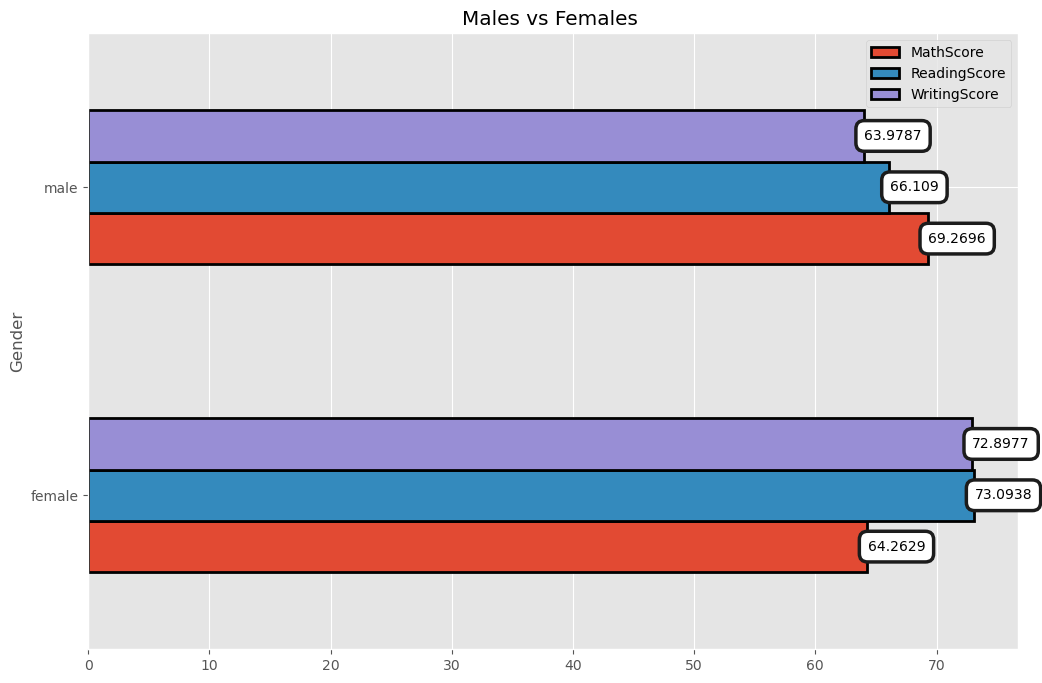

In [11]:
p1=pv1.plot(kind='barh',y=['MathScore','ReadingScore','WritingScore'],edgecolor='black',linewidth=2,figsize=(12,8),title='Males vs Females ')
p1.bar_label(p1.containers[0], label_type='edge',padding=0.5,bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "white", "edgecolor": "#1c1c1c", "linewidth" : 2.5, "alpha": 1})
p1.bar_label(p1.containers[1], label_type='edge',padding=0.5,bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "white", "edgecolor": "#1c1c1c", "linewidth" : 2.5, "alpha": 1})
p1.bar_label(p1.containers[2], label_type='edge',padding=0.5,bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "white", "edgecolor": "#1c1c1c", "linewidth" : 2.5, "alpha": 1})


From the Bar chart above, it's clear that males are better in Math while females are batter in writing.

**Let's create another columns which contain the overall score for each student by aggregating each exam score then devide it by 3**

In [12]:
df['OverallScore']=(df['MathScore']+df['ReadingScore']+df['WritingScore'])/3

In [13]:
df.head()

,Id,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore,OverallScore
0,0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,1,female,group C,some college,standard,completed,69,90,88,82.333333
2,2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,4,male,group C,some college,standard,none,76,78,75,76.333333


That's better!

# Data Analysis:

**Overallscore by EthnicGroup**

[Text(0, 0.5, '65.0971'),
 Text(0, 0.5, '65.7512'),
 Text(0, 0.5, '66.855'),
 Text(0, 0.5, '69.7398'),
 Text(0, 0.5, '74.2322')]

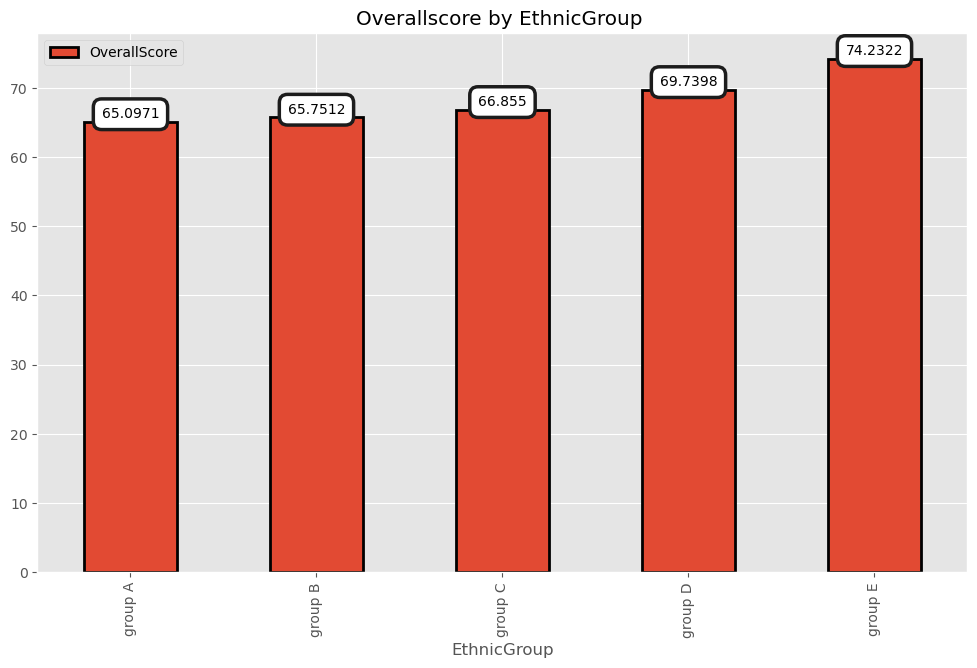

In [14]:
pv2=pd.pivot_table(df,index='EthnicGroup',values=['OverallScore'])
p2=pv2.plot(kind='bar',y=['OverallScore'],edgecolor='black',linewidth=2,figsize=(12,7),title='Overallscore by EthnicGroup ')
p2.bar_label(p2.containers[0], label_type='edge',padding=0.5,bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "white", "edgecolor": "#1c1c1c", "linewidth" : 2.5, "alpha": 1})


**Group E got the highest average score!**

**Overallscore by Gender**


[Text(0.5, 0, '70.0848'), Text(0.5, 0, '66.4524')]

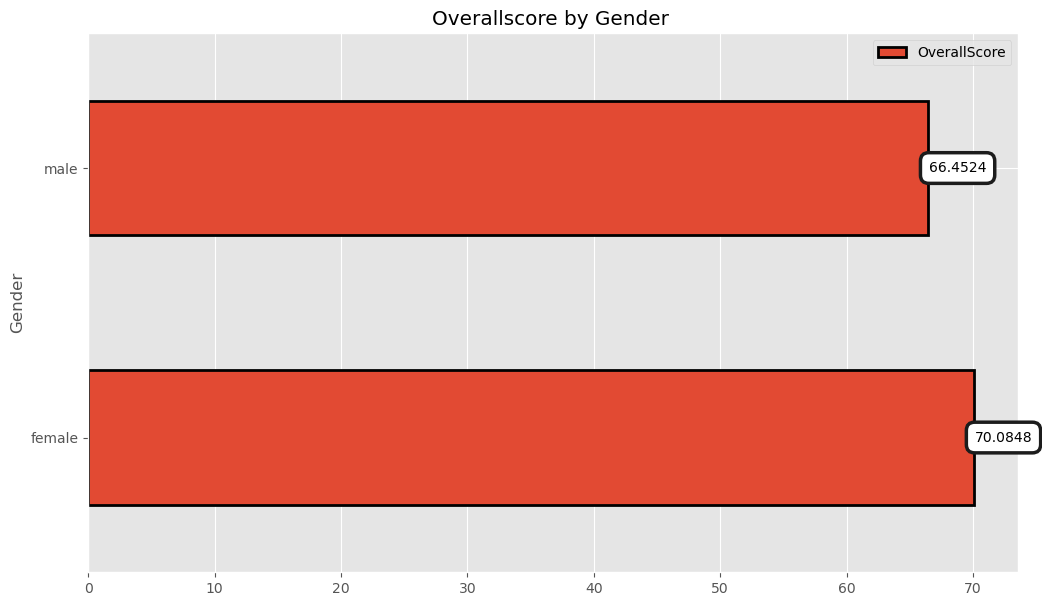

In [15]:
pv3=pd.pivot_table(df,index='Gender',values=['OverallScore'])
p3=pv3.plot(kind='barh',y=['OverallScore'],edgecolor='black',linewidth=2,figsize=(12,7),title='Overallscore by Gender ')
p3.bar_label(p3.containers[0], label_type='edge',padding=0.5,bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "white", "edgecolor": "#1c1c1c", "linewidth" : 2.5, "alpha": 1})


**On average, females got a higher exam score!**

**Overallscore by Parent Education level:**

[Text(0.5, 0, '64.1895'),
 Text(0.5, 0, '65.9195'),
 Text(0.5, 0, '68.2617'),
 Text(0.5, 0, '70.0903'),
 Text(0.5, 0, '72.4781'),
 Text(0.5, 0, '74.2054')]

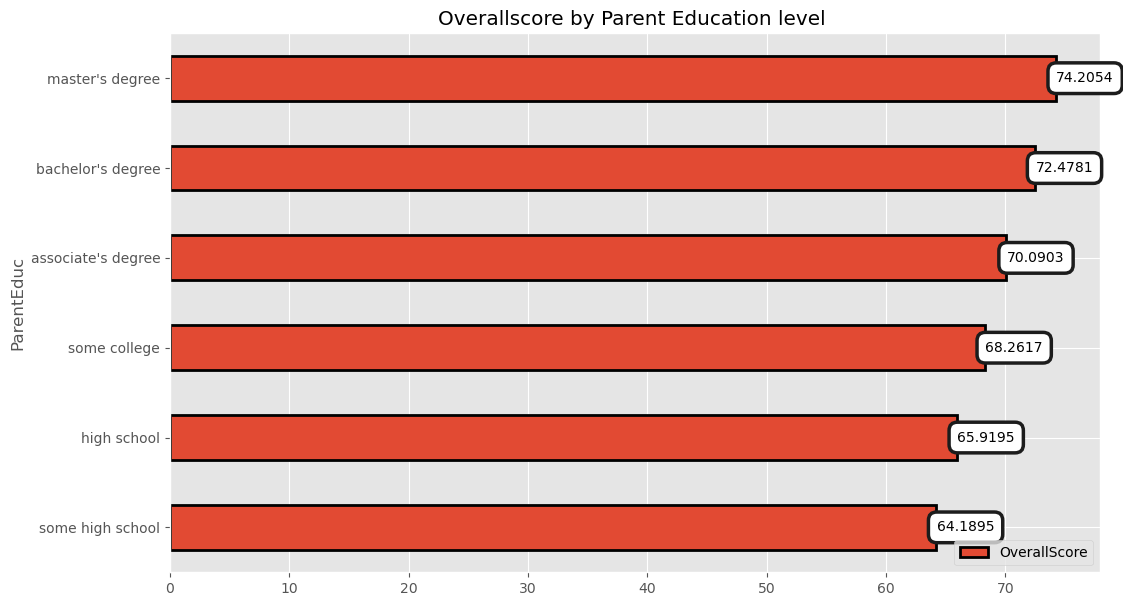

In [16]:
pv4=pd.pivot_table(df,index='ParentEduc',values=['OverallScore'])
pv4=pv4.sort_values(by=['OverallScore'],ascending=True)
p4=pv4.plot(kind='barh',y=['OverallScore'],edgecolor='black',linewidth=2,figsize=(12,7),title='Overallscore by Parent Education level ')
p4.bar_label(p4.containers[0], label_type='edge',padding=0.5,bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "white", "edgecolor": "#1c1c1c", "linewidth" : 2.5, "alpha": 1})


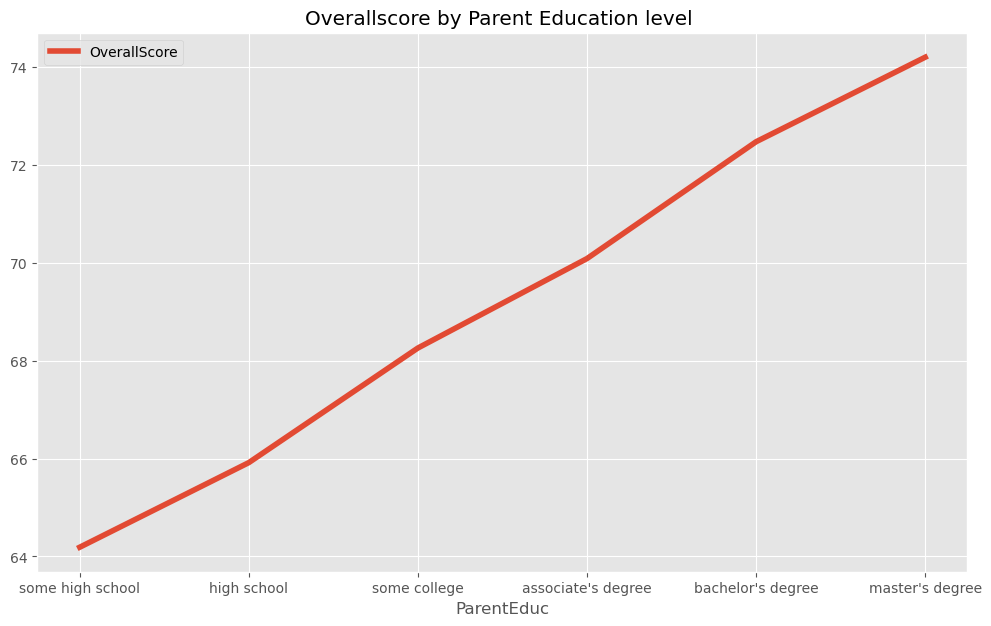

In [17]:
p4=pv4.plot(kind='line',y=['OverallScore'],linewidth=4,figsize=(12,7),title='Overallscore by Parent Education level ')


**Some high school level got the lowest exam score while the master's degree' holders got the highest exam scores.**

**Does the Lunch Type matters?**

[Text(0.5, 0, '62.0637'), Text(0.5, 0, '71.6342')]

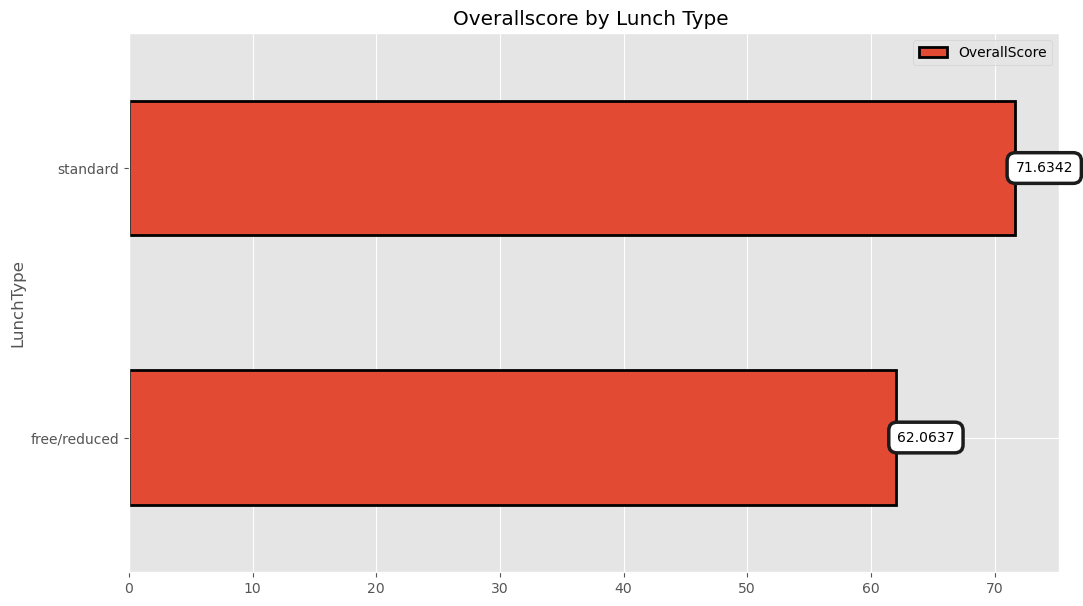

In [18]:
pv6=pd.pivot_table(df,index='LunchType',values=['OverallScore'])
pv6=pv6.sort_values(by=['OverallScore'],ascending=True)
p6=pv6.plot(kind='barh',y=['OverallScore'],edgecolor='black',linewidth=2,figsize=(12,7),title='Overallscore by Lunch Type ')
p6.bar_label(p6.containers[0], label_type='edge',padding=0.5,bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "white", "edgecolor": "#1c1c1c", "linewidth" : 2.5, "alpha": 1})


**Actually, students who got a standard lunch type got a higher average exam scores then the others!**

**Overallscore by Test Preparation**

[Text(0.5, 0, '65.8889'), Text(0.5, 0, '72.821')]

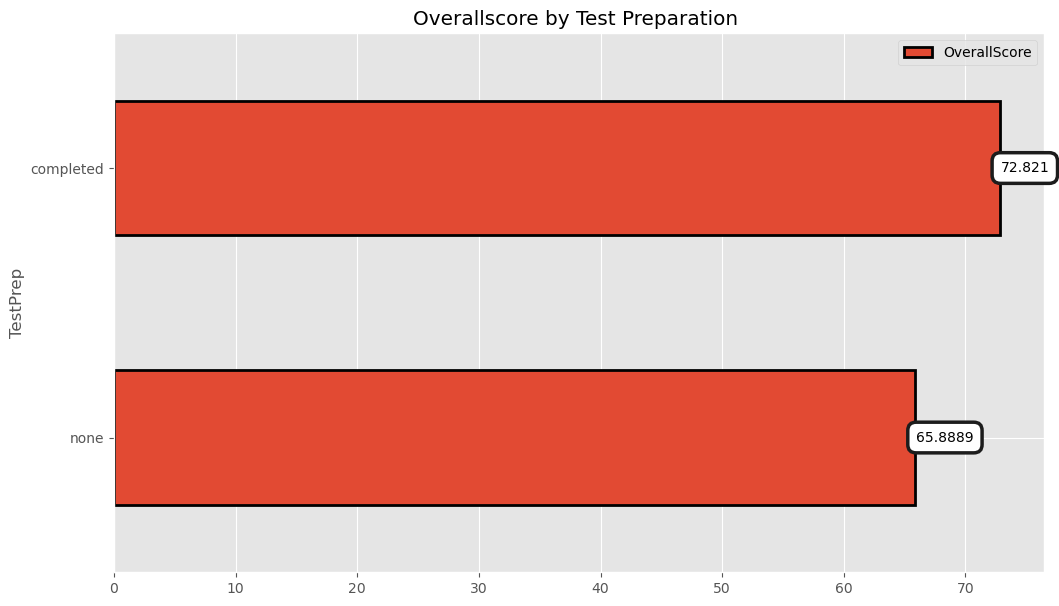

In [19]:
pv5=pd.pivot_table(df,index='TestPrep',values=['OverallScore'])
pv5=pv5.sort_values(by=['OverallScore'],ascending=True)
p5=pv5.plot(kind='barh',y=['OverallScore'],edgecolor='black',linewidth=2,figsize=(12,7),title='Overallscore by Test Preparation ')
p5.bar_label(p5.containers[0], label_type='edge',padding=0.5,bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "white", "edgecolor": "#1c1c1c", "linewidth" : 2.5, "alpha": 1})


**Students who prepared before the test got a better exam scores!**

<AxesSubplot:title={'center':'Overallscore distribution'}, ylabel='Frequency'>

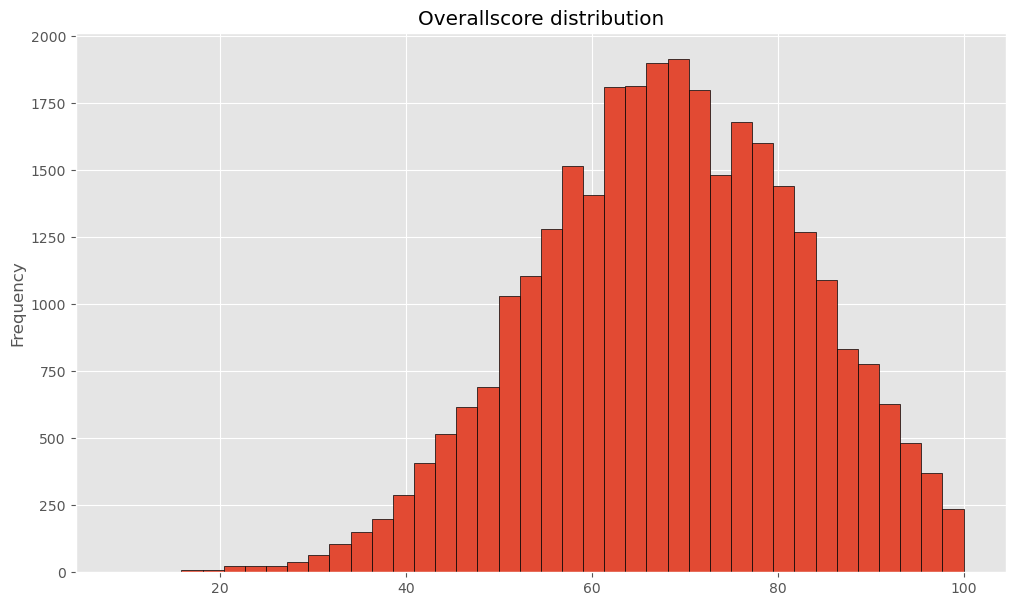

In [20]:
df['OverallScore'].plot(kind='hist',bins=40,figsize=(12,7),edgecolor='black',title='Overallscore distribution')


Most of the exam score range from 60 to 80!

**Let's see what really impact the OverAll score:**

In [21]:
df2=df.copy()

In [22]:
df2=df2.drop(columns='Id',axis=1)

In [23]:
df2.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore,OverallScore
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [24]:
df2['Gender']=pd.factorize(df2.Gender)[0]
df2['EthnicGroup']=pd.factorize(df2.EthnicGroup)[0]
df2['ParentEduc']=pd.factorize(df2.ParentEduc)[0]
df2['LunchType']=pd.factorize(df2.LunchType)[0]
df2['TestPrep']=pd.factorize(df2.TestPrep)[0]


**Data correlation:**

<AxesSubplot:>

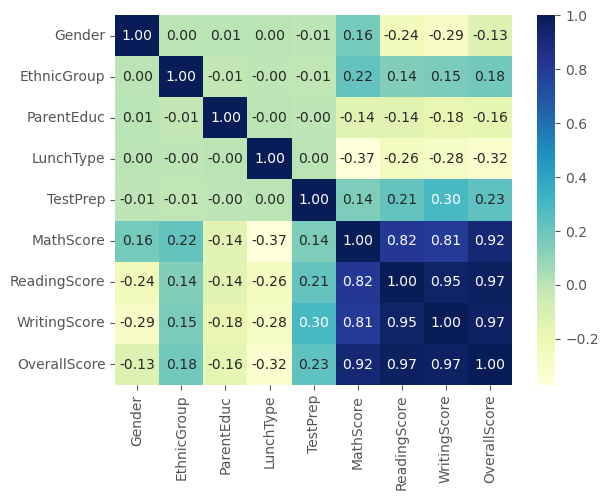

In [25]:
sns.heatmap(df2.corr(),annot = True, cmap= 'YlGnBu', fmt= '.2f')

From the heatmap above, it's obevious that Lunch type and Test preparation has a higher impact on the student's overallscore. Gender, Ethnic group and Parent education level has an impact also on the score.

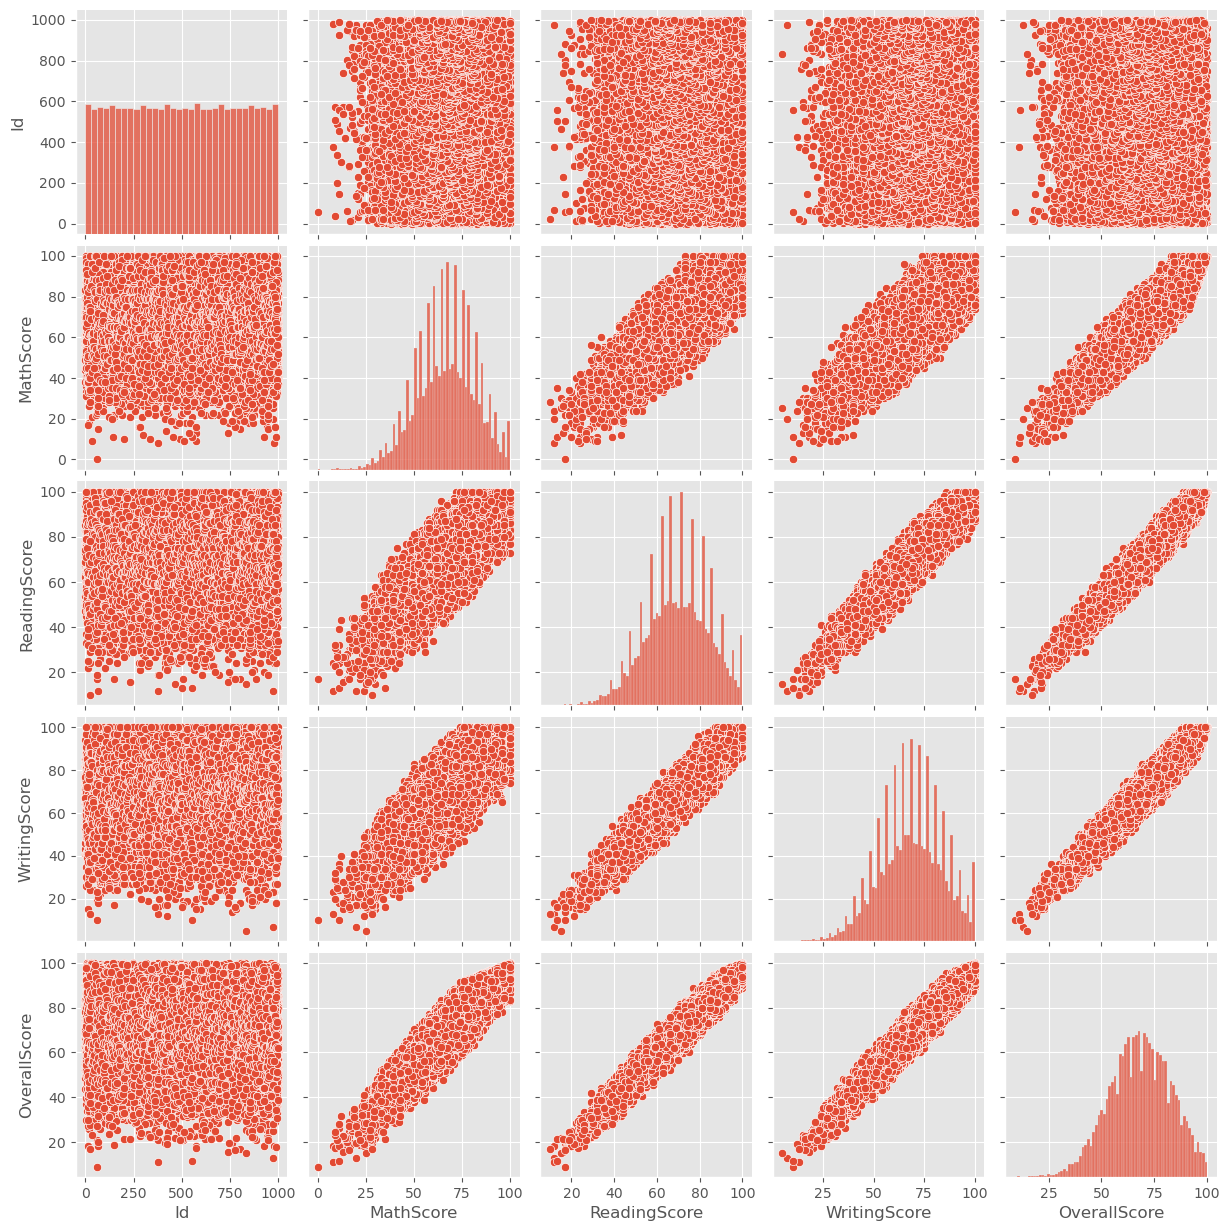

In [26]:
sns.pairplot(df)


In [27]:
df.head()

,Id,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore,OverallScore
0,0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,1,female,group C,some college,standard,completed,69,90,88,82.333333
2,2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,4,male,group C,some college,standard,none,76,78,75,76.333333
